In [64]:
#To suppressing warning message for a clean output
import warnings
warnings.filterwarnings("ignore")
#Pandas for data loading and manipulation
import pandas as pd
#Numpy Fot numerical operation
import numpy as np
#Matplotlib for graps plotting
import matplotlib.pyplot as plt
#For spliting dataset into train and test
from sklearn.model_selection import train_test_split
#For Standard Scaler feature normalization
from sklearn.preprocessing import StandardScaler
#E For Evaluating the matrics for regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#For Linear Regression Model 
from sklearn.linear_model import LinearRegression
# For RFR model
from sklearn.ensemble import RandomForestRegressor

#For tesorflow deep learing
import tensorflow as tf
#For keras models and buid ANN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [65]:
#Load dataset
df = pd.read_csv("weather_prediction_dataset.csv")
#Display Dataset
df.shape

(3654, 165)

In [66]:
#Remove rows which have missing values
df = df.dropna()
#Checking dataset after removing or cleaning
df.shape

(3654, 165)

In [67]:
# Selecting numeric colums and machine learing module with diplaying numeric features
df_num = df.select_dtypes(include=[np.number])
df_num.shape

(3654, 165)

In [68]:
#Defining the target variables max-temp
target_col = "TOURS_temp_max"
#X containing all the features but not the target column
X = df_num.drop(columns=[target_col])
# y contains the target variable
y = df_num[target_col]
# Displaying
X.shape, y.shape

((3654, 164), (3654,))

In [69]:
#Split Dataset into training and testing where 80% Trainig and 20 % Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Displaying the training and testing 
X_train.shape, X_test.shape

((2923, 164), (731, 164))

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr)

mae_lr, rmse_lr, r2_lr

(0.05371134720948859, 0.0705380820236152, 0.9999154236512332)

In [72]:
# For initializing the RFR with 200 Trees
rf = RandomForestRegressor(n_estimators=200, random_state=42)
# for training RFR using unscaled training datas
rf.fit(X_train, y_train)
#

pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)

mae_rf, rmse_rf, r2_rf

(0.41673871409028707, 0.5934008329650461, 0.9940145343595327)

In [73]:
#Seting thr random seed 
tf.random.set_seed(42)
#for defining the ANN model
ann = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])

#For compiling thr ANN using Adam optimizer and Mean Squad Error Loss
ann.compile(optimizer="adam", loss="mse")

#For training ANN model
history = ann.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 100.4657 - val_loss: 29.0951
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 18.3558 - val_loss: 12.8258
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4837 - val_loss: 8.7332
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5058 - val_loss: 6.9185
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.9957 - val_loss: 5.9149
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0982 - val_loss: 5.3450
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4912 - val_loss: 4.9490
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0483 - val_loss: 4.7040
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6954 - val_loss: 4.5054
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4043 - val_loss: 4.3335
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1655 - val_loss: 4.1854
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9645 - 

In [74]:
# For predicting the target valuews by using ANN
pred_ann = ann.predict(X_test_scaled).flatten()
#for calculating the evaluation metrics 
mae_ann = mean_absolute_error(y_test, pred_ann)
rmse_ann = np.sqrt(mean_squared_error(y_test, pred_ann))
r2_ann = r2_score(y_test, pred_ann)
#For diplaying the result or output
mae_ann, rmse_ann, r2_ann

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(1.2295873302767606, 1.5633958961254815, 0.9584530091740197)

In [75]:
#Creating the Compartison table for all the featured models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "ANN"],
    "MAE": [mae_lr, mae_rf, mae_ann],
    "RMSE": [rmse_lr, rmse_rf, rmse_ann],
    "R2": [r2_lr, r2_rf, r2_ann]
})

results

,Model,MAE,RMSE,R2
0,Linear Regression,0.053711,0.070538,0.999915
1,Random Forest,0.416739,0.593401,0.994015
2,ANN,1.229587,1.563396,0.958453


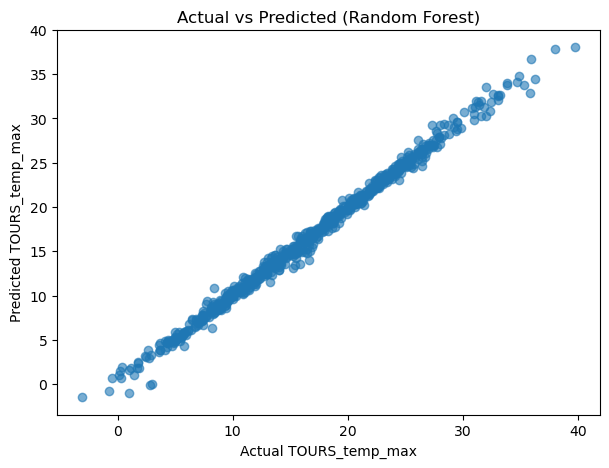

In [76]:
#Ploting rhe actual vs predicted values of Random Forest
plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_rf, alpha=0.6)
plt.xlabel("Actual TOURS_temp_max")
plt.ylabel("Predicted TOURS_temp_max")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

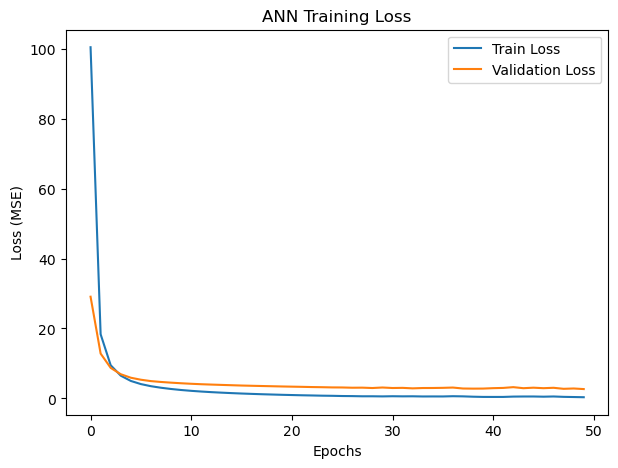

In [77]:
#Ploting the training and validation loss for ANN
plt.figure(figsize=(7,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("ANN Training Loss")
plt.legend()
plt.show()